Simple linear regression with time series

import pandas as pd

In [15]:
df= pd.read_csv('tunnel.csv', parse_dates=["Day"])

In [16]:
df = df.set_index('Day')
df = df.to_period()


In [17]:
df.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [35]:
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


simplefilter("ignore")

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout = True, figsize=(20,5))
plt.rc("axes", labelweight = "bold", labelsize = "large", titleweight = "bold", titlesize = 14, titlepad = 10)

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


In [36]:
##timestep feature
df_1 = df.copy()
df_1['time'] = np.arange(len(df.index))
df_1.head()






,NumVehicles,time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [37]:

from sklearn.linear_model import LinearRegression

X = df_1.loc[:,['time']]
y = df_1.loc[:,'NumVehicles']

model = LinearRegression()
model.fit(X,y)





LinearRegression()

In [38]:
y_pred = pd.Series(model.predict(X), index = X.index)

In [39]:
y_pred

Day
2003-11-01     98176.206344
2003-11-02     98198.703794
2003-11-03     98221.201243
2003-11-04     98243.698693
2003-11-05     98266.196142
                  ...      
2005-11-12    114869.313898
2005-11-13    114891.811347
2005-11-14    114914.308797
2005-11-15    114936.806247
2005-11-16    114959.303696
Freq: D, Length: 747, dtype: float64

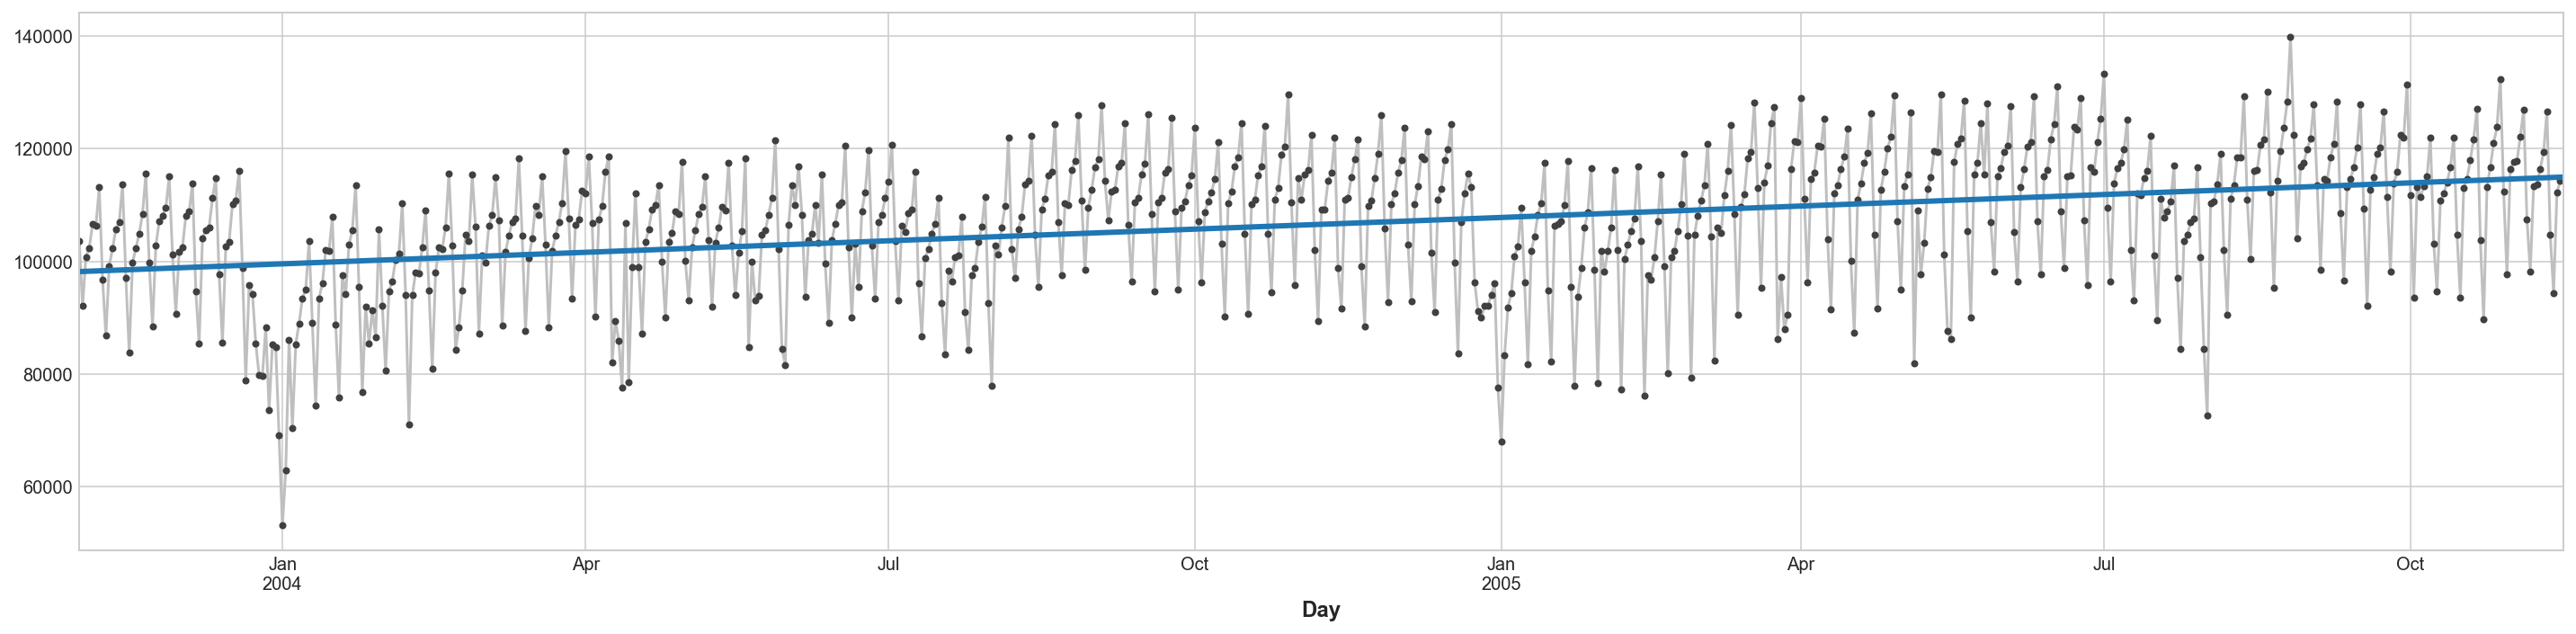

In [40]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)

lag feature

In [41]:
df_1['lag_1'] = df_1['NumVehicles'].shift(1)
df_1.head()

,NumVehicles,time,lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [43]:
df_1['lag_1'].isna().sum()

1

In [46]:
X = df_1.loc[:, ['lag_1']]
X.dropna(inplace=True)

y=df_1.loc[:,'NumVehicles']
y,X = y.align(X, join='inner')

model = LinearRegression()
model.fit(X,y)

y_pred = pd.Series(model.predict(X), index=X.index)

let's plot it

Text(0.5, 1.0, 'Lag plot of Tunnel Traffic')

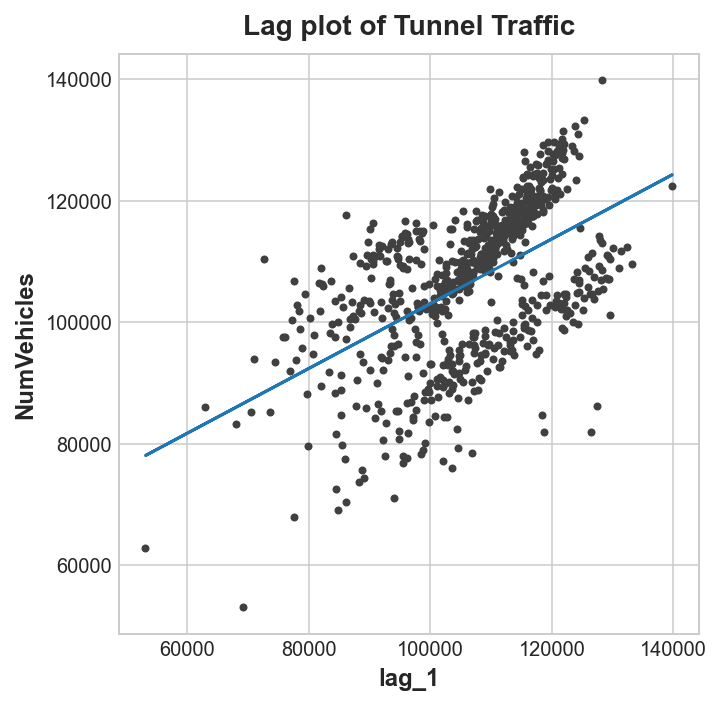

In [47]:
fig , ax = plt.subplots()

ax.plot(X['lag_1'], y, '.' , color ='0.25')
ax.plot(X['lag_1'], y_pred)

ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('lag_1')
ax.set_title('Lag plot of Tunnel Traffic')

we see that there's a correlation the predicted values and using the one step lag that we used. 

What happens if we plot the target the predicted values.    

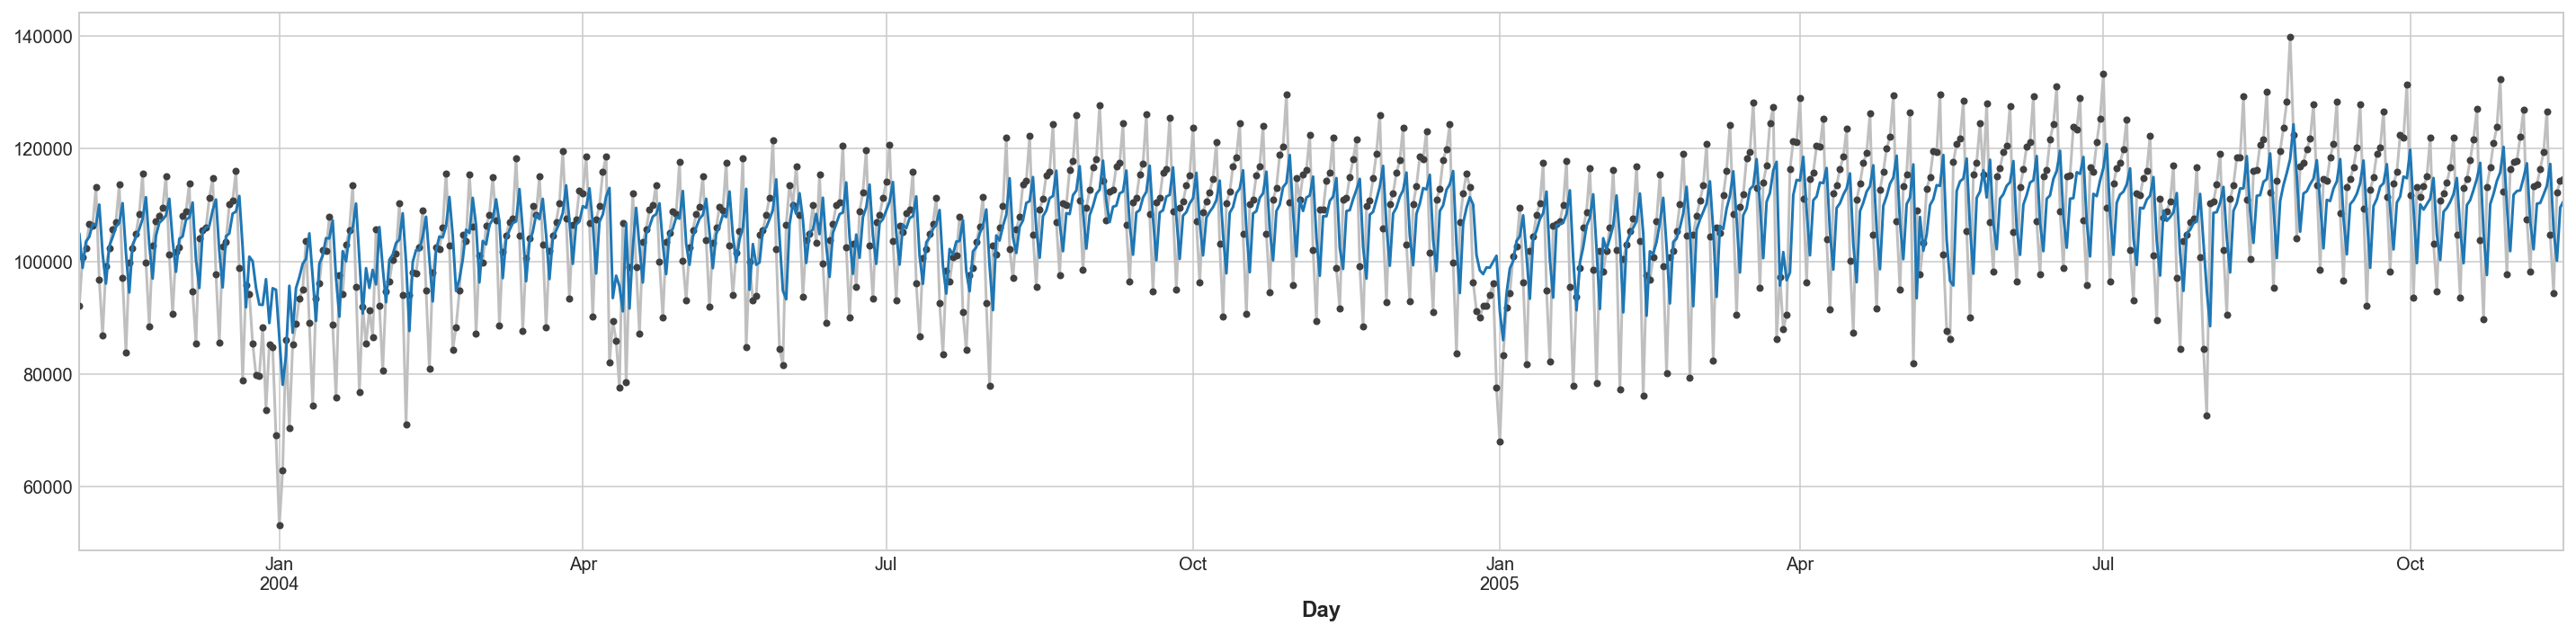

In [48]:
ax = y.plot(**plot_params)
ax = y_pred.plot()